In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

# 1. Read the dataset

In [2]:
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')

In [38]:

d_train.head()

#can neglect Name, Capine, Ticket, PassengerId


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
d_train.shape

(891, 12)

# 2-Data investigation

In [5]:
d_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


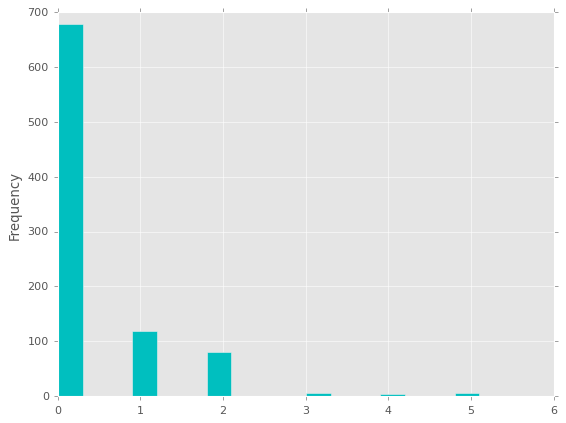

In [67]:
d_train.Parch.plot(kind = 'hist',bins = 20 , color='c')
plt.style.use('seaborn-colorblind')

<AxesSubplot:ylabel='Frequency'>

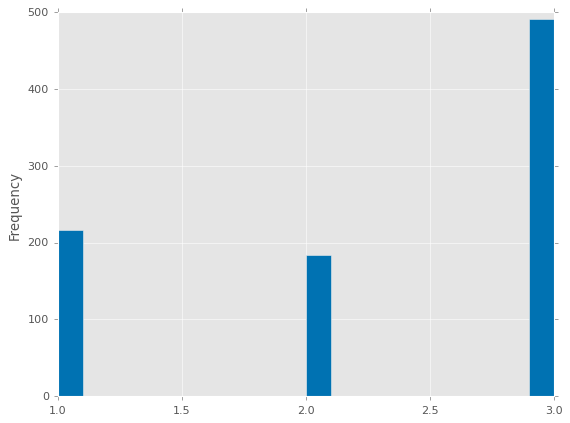

In [68]:
d_train.Pclass.plot(kind = 'hist',bins = 20)

<AxesSubplot:ylabel='Frequency'>

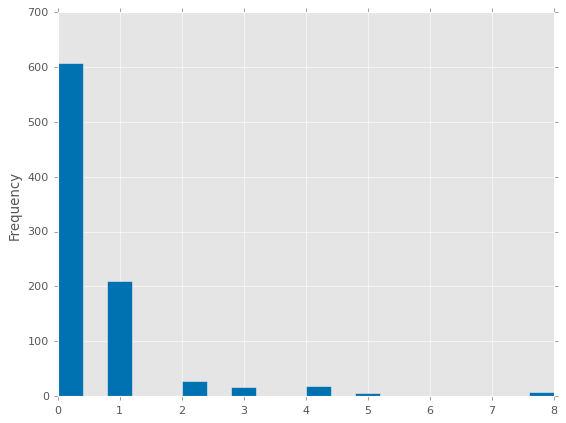

In [69]:
d_train.SibSp.plot(kind = 'hist',bins = 20)

<AxesSubplot:ylabel='Frequency'>

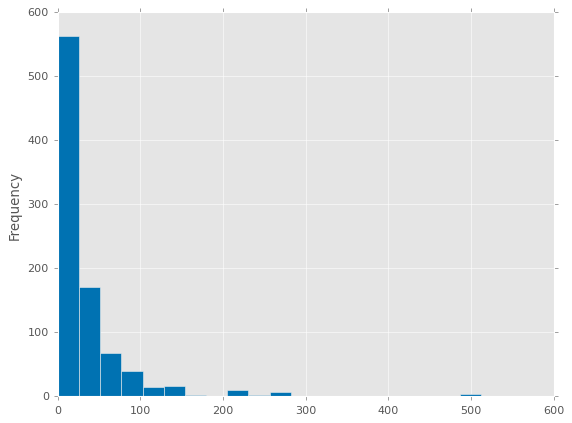

In [70]:
d_train.Fare.plot(kind = 'hist',bins = 20)

<AxesSubplot:ylabel='Frequency'>

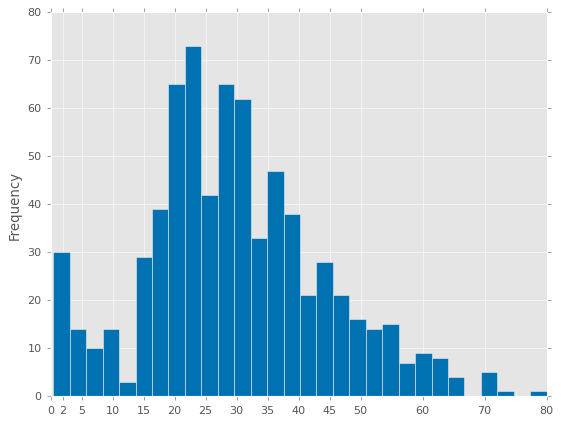

In [71]:
d_train.Age.plot(kind = 'hist',bins = 30,xticks=([0,2,5,10,15,20,25,30,35,40,45,50,60,70,80]))

In [11]:
d_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
d_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
d_train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [14]:
d_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [15]:
d_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [16]:
#d_train.Survived.unique()

In [17]:
d_train[d_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# 3. Data preprocessing

issues : 
1- Capin, Name , PassangerId and Ticket gonna be droped 
2- null values found in Age and Embarked need to be filled 
3- Survived column needs to be last column


first issue:

In [18]:
d_copy=d_train.copy()
dt_copy=d_test.copy()

In [19]:
d_copy.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace=True)
dt_copy.drop(columns = ['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [20]:
d_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


second issue:


In [21]:
d_copy['Age'] =d_copy.Age.fillna(d_copy.Age.mean())
d_copy['Fare'] =d_copy.Fare.fillna(d_copy.Fare.mean())
d_copy['Pclass'] =d_copy.Pclass.fillna(d_copy.Pclass.mean())
d_copy['SibSp'] =d_copy.SibSp.fillna(d_copy.SibSp.mean())
d_copy['Parch'] =d_copy.Parch.fillna(d_copy.Parch.mean())

dt_copy['Age'] =d_copy.Age.fillna(d_copy.Age.mean())
dt_copy['Fare'] =d_copy.Fare.fillna(d_copy.Fare.mean())
dt_copy['Pclass'] =d_copy.Pclass.fillna(d_copy.Pclass.mean())
dt_copy['SibSp'] =d_copy.SibSp.fillna(d_copy.SibSp.mean())
dt_copy['Parch'] =d_copy.Parch.fillna(d_copy.Parch.mean())
# mean or mode ??

In [22]:
d_copy.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

<AxesSubplot:ylabel='Frequency'>

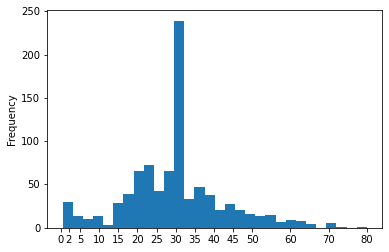

In [23]:
d_copy.Age.plot(kind = 'hist',bins = 30,xticks=([0,2,5,10,15,20,25,30,35,40,45,50,60,70,80]))

In [24]:
d_copy=pd.get_dummies(d_copy,columns=["Sex","Embarked",],drop_first=False)
dt_copy=pd.get_dummies(dt_copy,columns=["Sex","Embarked",],drop_first=False)


In [25]:
d_copy


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


Issue 3:

In [26]:
d_copy=d_copy.drop(columns=["Survived"]).assign(Survived=d_train["Survived"])

In [27]:
d_copy


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.000000,1,0,7.2500,0,1,0,0,1,0
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1
2,3,26.000000,0,0,7.9250,1,0,0,0,1,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1,0
887,1,19.000000,0,0,30.0000,1,0,0,0,1,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1,0
889,1,26.000000,0,0,30.0000,0,1,1,0,0,1


# 4. Features transformation

In [28]:
#from sklearn.preprocessing import  QuantileTransformer
#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import PowerTransformer


#col_names = ['Age','Fare','SibSp','Parch']
#col_names2 = ['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
#features = d_copy[col_names]

#scaler = QuantileTransformer()

#d_copy[col_names] = scaler.fit_transform(features.values)
#d_copy[col_names2] = d_copy[col_names2]*0.5
#d_copy

 

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_train = DecisionTreeClassifier(random_state=0,max_depth=20,min_samples_split=2)
clf_test = DecisionTreeClassifier(random_state=0,max_depth=20,min_samples_split=2)


In [30]:
clf_train.fit(d_copy.iloc[:,:-1],d_copy.iloc[:,-1])
clf_test.fit(dt_copy.iloc[:,:-1],dt_copy.iloc[:,-1])

DecisionTreeClassifier(max_depth=20, random_state=0)

In [31]:
pred_train = clf_train.predict(d_copy.iloc[:,:-1])
pred_test = clf_test.predict(dt_copy.iloc[:,:-1])



In [32]:
pred_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [33]:
pred_test

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_train,d_copy.iloc[:,-1])*100

98.09203142536475